# March_5th_Logistic Regression Cardio Vascular prediction

In [ ]:
"""Analysis and Prediction 

Abstract
cardiovascular diseases are the first leading cause of death across the world as well. World Health Organization has estimated 
that the mortality rate caused by heart diseases will mount to 23 million cases by 2030. Hence, the use of data mining 
algorithms could be useful in predicting coronary artery diseases. 

Objective
The objective of this research is to build classifiers to predict whether a person has cardiovascular disease based on 
their medical test, age, and gender also also to identify which test is more reliable in determining cardiovascular disease.

Knowledge of the risk factors associated with heart disease helps health care professionals
to identify patients at high risk of having heart disease . Statistical analysis has identified
the risk factors associated with heart disease to be age, blood pressure, smoking habit, total
cholesterol, diabetes, hypertension, family history of heart disease, obesity, and lack of
physical activity.

# note:-Here family History, Other habits like Smoking,Alcohal etc are not inclused.


Method
Collected patient data from four national hospital. Two from hospital in USA and two from Europe. 
"""

In [1]:
# import the basic library
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



In [2]:
os.getcwd()

'C:\\Users\\User\\Desktop\\Batch Weekend Feb_4th\\March_5th_Gradient decent,Lasso_Ridge'

In [3]:
df=pd.read_csv("Cardio_vascular.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.shape

(1025, 14)

In [ ]:
# FIRST STEP is to understand the Problem Statements, Different Independents and Dependent Variable.

#### The dataset used in this article is the Cleveland Heart Disease dataset. There are 14 columns in the dataset, 
which are described below.
1. Age, in years
2. Sex, 1 = male; 0 = female
3. cp: chest pain type
– Value 0: typical angina
– Value 1: atypical angina
– Value 2: non-anginal pain
– Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dAttribute Information:
6. fbs: (fasting blood sugar > 120 mg/dl) 1 = true; 0 =false
7. restecg: resting electrocardiographic results
– Value 0: normal
– Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of >0.05 mV)
– Value 2: showing probable or definite left ventricu lar hypertrophy by Estes’ criteria
8. thalach: maximum heart rate achieved during stress TEST
9. exang: exercise induced angina, 1 = yes; 0 = no
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
– Value 0: upsloping
– Value 1: flat
– Value 2: downsloping
12. ca: number of major vessels (0-4) colored by flourosopy
13. thal: thalassmia, 0 = null; 1=normal; 2 = fixed defect; 3 = reversible defect
14. condition (target) : 0 = no disease, 1 = disease


In [ ]:
# changing the name of the columns for better understanding

In [6]:
df.rename(columns={"sex":"gender","cp":"rest_cp","trestbps":"rest_bp","chol":"cholesterol","fbs":"fast_bloodsugar",
                   "restecg":"rest_ecg","thalach":"stress_HR","exang":"Exercise_cp","oldpeak":"STdepression_Exerc",
                   "slope":"STpeak_exerc","ca":"coloured_vessels","thal":"thalassmia","target":"heart_disease"},inplace=True)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1025 non-null   int64  
 1   gender              1025 non-null   int64  
 2   rest_cp             1025 non-null   int64  
 3   rest_bp             1025 non-null   int64  
 4   cholesterol         1025 non-null   int64  
 5   fast_bloodsugar     1025 non-null   int64  
 6   rest_ecg            1025 non-null   int64  
 7   stress_HR           1025 non-null   int64  
 8   Exercise_cp         1025 non-null   int64  
 9   STdepression_Exerc  1025 non-null   float64
 10  STpeak_exerc        1025 non-null   int64  
 11  coloured_vessels    1025 non-null   int64  
 12  thalassmia          1025 non-null   int64  
 13  heart_disease       1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# condition (target) : 0 = no disease, 1 = disease
# We can say ; Cardiovascular diseases maximum risk at age 40-65 age

#sex  (0 = female, 1 = male )

In [ ]:
# condition (target) : 0 = no disease, 1 = disease
#cp (0 = , 1 = male,2=,3= )

In [8]:
df.head()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1025 non-null   int64  
 1   gender              1025 non-null   int64  
 2   rest_cp             1025 non-null   int64  
 3   rest_bp             1025 non-null   int64  
 4   cholesterol         1025 non-null   int64  
 5   fast_bloodsugar     1025 non-null   int64  
 6   rest_ecg            1025 non-null   int64  
 7   stress_HR           1025 non-null   int64  
 8   Exercise_cp         1025 non-null   int64  
 9   STdepression_Exerc  1025 non-null   float64
 10  STpeak_exerc        1025 non-null   int64  
 11  coloured_vessels    1025 non-null   int64  
 12  thalassmia          1025 non-null   int64  
 13  heart_disease       1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
df.describe()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.heart_disease.value_counts()

1    526
0    499
Name: heart_disease, dtype: int64

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

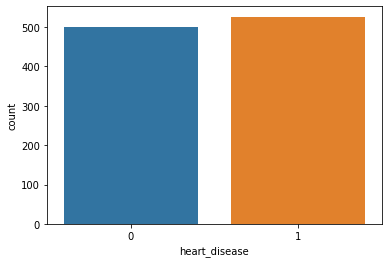

In [12]:
sns.countplot(x="heart_disease",data=df)

In [13]:
# lets check the missing value
df.isnull().sum()

age                   0
gender                0
rest_cp               0
rest_bp               0
cholesterol           0
fast_bloodsugar       0
rest_ecg              0
stress_HR             0
Exercise_cp           0
STdepression_Exerc    0
STpeak_exerc          0
coloured_vessels      0
thalassmia            0
heart_disease         0
dtype: int64

In [ ]:
#splitting the data into independent and dependent variable


In [14]:
X=df.drop(["heart_disease"],axis=1)
Y=df["heart_disease"]

In [15]:
X.head()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
# scaling the data set


In [16]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
scaljob=StandardScaler()
X_scaled=scaljob.fit_transform(X)
X_scaled

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [17]:
# We can convert it in dataframe
X_scaled_df=pd.DataFrame(X_scaled,index=X.index,columns=X.columns)
X_scaled_df

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122
1021,0.613800,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852
1022,-0.819834,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122
1023,-0.488996,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122


In [18]:
# collinear cofficient
df.corr()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia,heart_disease
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
gender,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
rest_cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
rest_bp,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
cholesterol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fast_bloodsugar,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
rest_ecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
stress_HR,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
Exercise_cp,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
STdepression_Exerc,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<AxesSubplot:>

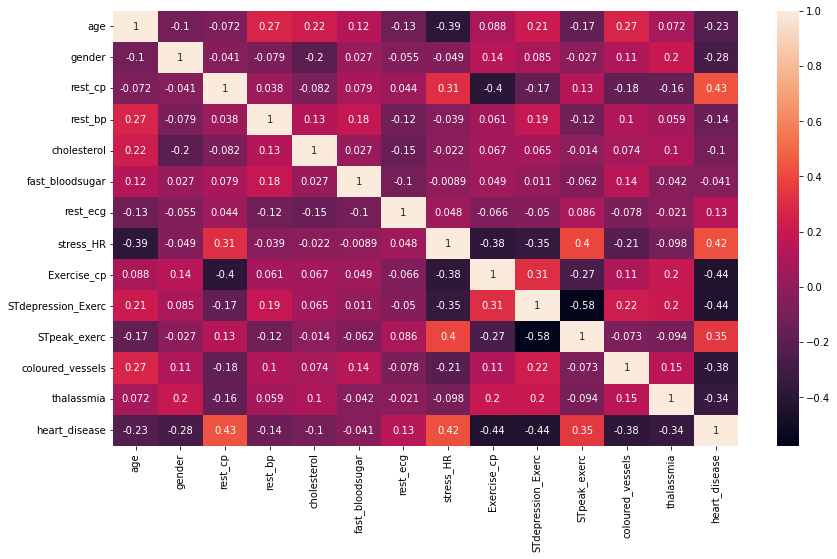

In [20]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True)

In [21]:
X_scaled_df.corr()

,age,gender,rest_cp,rest_bp,cholesterol,fast_bloodsugar,rest_ecg,stress_HR,Exercise_cp,STdepression_Exerc,STpeak_exerc,coloured_vessels,thalassmia
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297
gender,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424
rest_cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341
rest_bp,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276
cholesterol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244
fast_bloodsugar,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177
rest_ecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504
stress_HR,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068
Exercise_cp,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201
STdepression_Exerc,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672


<AxesSubplot:>

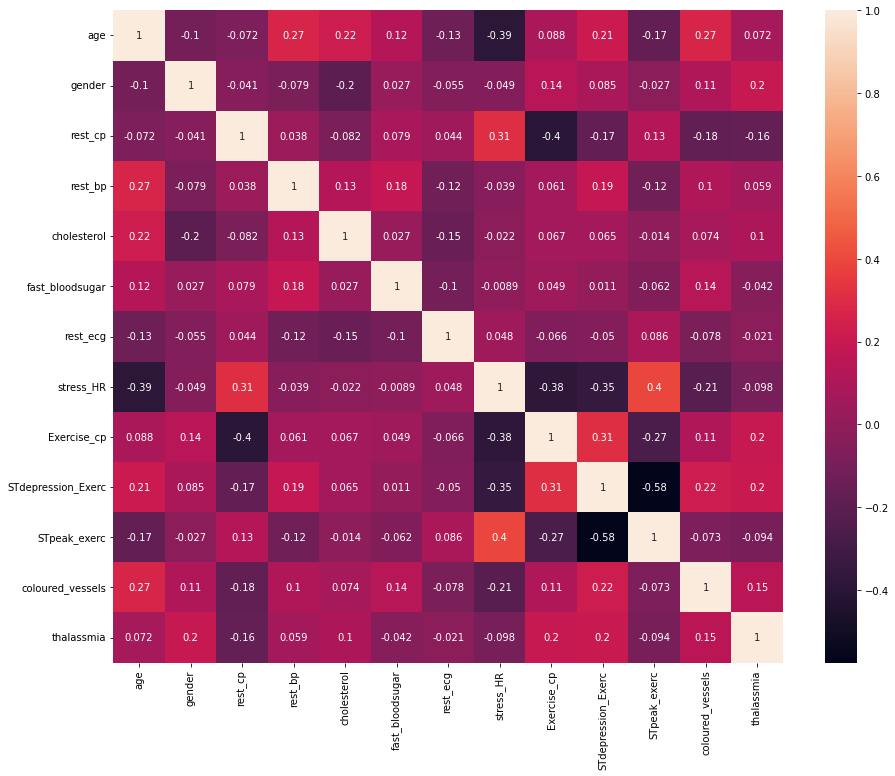

In [22]:
plt.figure(figsize=(15,12))
sns.heatmap(X_scaled_df.corr(),annot=True)

In [ ]:
# split the data in training and testing 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled_df,Y,test_size=0.2,random_state=101)

In [25]:
X_train.shape

(820, 13)

In [ ]:
# logistic Regression Model busilding

In [26]:
from sklearn.linear_model import LogisticRegression


In [27]:
lr=LogisticRegression()


In [28]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [29]:
Y_predict_train=lr.predict(X_train)

In [ ]:
#Y_predict_train

In [ ]:
#Y_train

In [30]:
Y_predict_test=lr.predict(X_test)

In [ ]:
# model accuracy 


In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
# training accuracy
accuracy_score(Y_train,Y_predict_train)

0.8426829268292683

In [33]:
# testing accuracy
accuracy_score(Y_test,Y_predict_test)

0.8634146341463415

In [ ]:
"""When a classification model is built various evaluation metrics 
are used to evaluate the performance . Such as Accuracy, 
Confusion Matrix, Classification report (i.e Precision, Recall, F1
score), and AUC-ROC curve are used"""


In [ ]:
"""Confusion matrix got its name from the fact that it easier to 
identify if the classification model is getting 
confused or not. For a classification model, confusion can result 
in misidentifying the data, which further results in 
performance degradation."""


[[84 22]
 [ 6 93]]


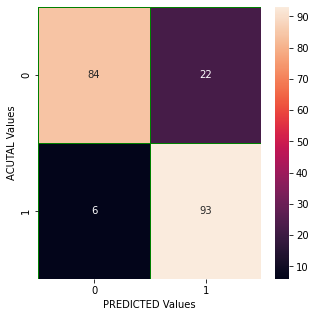

In [34]:
lr_conf_mat=confusion_matrix(Y_test,Y_predict_test)
print(confusion_matrix(Y_test,Y_predict_test))

#Visualization Confusion Matrix
plt.subplots(figsize=(5,5))
sns.heatmap(lr_conf_mat,annot=True,linewidths=0.5,linecolor="green",fmt=".0f")

plt.xlabel("PREDICTED Values")
plt.ylabel("ACUTAL Values")
plt.show()

[[302  91]
 [ 38 389]]


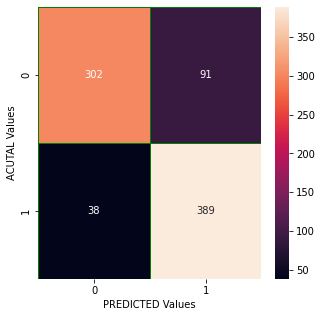

In [37]:
# confusion matrix for training data
lr_conf_mat_train=confusion_matrix(Y_train,Y_predict_train)
print(confusion_matrix(Y_train,Y_predict_train))

#Visualization Confusion Matrix
plt.subplots(figsize=(5,5))
sns.heatmap(lr_conf_mat_train,annot=True,linewidths=0.5,linecolor="green",fmt=".0f")

plt.xlabel("PREDICTED Values")
plt.ylabel("ACUTAL Values")
plt.show()

In [38]:
print("## CLASSIFICATION REPORT DT TESTING MODEL  ######")
print(classification_report(Y_test,Y_predict_test))

## CLASSIFICATION REPORT DT TESTING MODEL  ######
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       106
           1       0.81      0.94      0.87        99

    accuracy                           0.86       205
   macro avg       0.87      0.87      0.86       205
weighted avg       0.87      0.86      0.86       205



In [ ]:
"""## condition (target) : 0 = no disease, 1 = disease

#PRECISION REPORT

Precision is the fraction of true positive examples
among the examples that the model classified as
positive. In other words, the number of true positives
divided by the number of false positives plus true
positives.

# In training Model The classification report of the model shows that 89% prediction of absence of heart disease was predicted correct 
#and 99 % of presence of heart disease was predicted correct.

#In testing Model The classification report of the model shows that 89% prediction of absence of heart disease was predicted correct 
#and 92 % of presence of heart disease was predicted correct.

# RECALL
Recall, also known as sensitivity, is the fraction of
examples classified as positive, among the total
number of positive examples. In other words, the
number of true positives divided by the number of true
positives plus false negatives.

# F SCORE

The F-score, also called the F1-score, is a measure of a model’s accuracy
on a dataset. It is used to evaluate binary classification systems, which
classify examples into ‘positive’ or ‘negative’.
The formula for the standard F1-score is the harmonic mean of the
precision and recall

 We consider a convolutional neural network in
the medical domain, which evaluates mammograms and detects
tumors. We consider it much worse to miss a tumor than to give a false
alarm to a nonexistent tumor.

# SUPPORT no. of examples as 0 and 1.

#macro-avg is mean average of precision/recall/F1 of all classes. 
 while weighed avg is the total number TP (true positive of all classes)/total number of objects in all classes. """
 

In [ ]:
#ROC is a probability curve and AUC represents the degree or measure of separability.
"""The classification done internally on the based on thershold value... similar to DEEP Leaning different activation function.
Assuming a threshold of 0.5 for a model classifier, than the value 0.6,0.7,0.8,0.9 consider as 1. it is misleading.
Assuming a threshold of 0.78 for a model classifier, than the value 0.6,0.7 will not consider as  consider as 1."""

"""
TPR (True Positive Rate)
FPR (False Positive Rate)

To explain TPR and FPR, Lets take the example of justice system. Naturally, any justice system only wants to punish people 
guilty of crimes and doesn’t want to charge an innocent person. 

consider zero for (innocent) or a one for (guilty).

In this case, the TPR is the proportion of guilty criminals our model was able to capture. 
Thus, the numerator is guilty criminals captured, and the denominator is total criminals. 
This ratio is also known as recall or sensitivity.

TPR (True Positive Rate)/Sensitivity/Recall = TP/(TP+FN)

The FPR is the proportion of innocents we incorrectly predicted as criminal (false positives) 
divided by the total number of actual innocent citizens. Thus, the numerator is innocents captured, and the denominator is 
total innocents.

FPR (False Positive Rate) = FP/(TN+FP)

Usually, we would want high TPR (because we want to capture all the criminals) and low FPR (because we don’t want to 
capture innocent people).
"""


In [ ]:

"""
“Area Under the ROC Curve” (AUC) of “Receiver Characteristic Operator” (ROC). 

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the 
Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives
as Positives, and all Positives as Negatives.

When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. 
Meaning either the classifier is predicting random class or constant class for all the data points.
So, the higher the AUC value for a classifier, the better its ability to distinguish between positive and negative classes."""


In [39]:
"""Based on sklearn documentation, predict_proba returns probability 
estimates for all classes and the results are ordered by 
the label of classes.
our lr model is a binary classifier. Hence, lr.predict_proba(X_test1) 
returns 2 columns for the negative and positive class."""

probability1 = lr.predict_proba(X_test)


#print(probability1)

In [40]:


"""Based on sklearn documentation, predict_proba returns probability 
estimates for all classes and the results are ordered by 
the label of classes.
our lr model is a binary classifier. Hence, lr.predict_proba(X_test1) 
returns 2 columns for the negative(0) and positive class(1)."""


Proba_score_positive_class= lr.predict_proba(X_test)[:,1]
Proba_score_positive_class 

array([0.05902328, 0.97084224, 0.65310887, 0.30285   , 0.3457221 ,
       0.18522954, 0.71175935, 0.86131146, 0.83139208, 0.3457221 ,
       0.87360939, 0.82031161, 0.76683857, 0.53705951, 0.89862598,
       0.81883042, 0.06876863, 0.88970078, 0.25343301, 0.23953152,
       0.64642498, 0.36404719, 0.9432271 , 0.73959921, 0.00393022,
       0.96861193, 0.65057313, 0.68508757, 0.20934328, 0.71175935,
       0.41050256, 0.88115936, 0.82031161, 0.9212402 , 0.04901304,
       0.07170619, 0.00815914, 0.67151674, 0.17159293, 0.04826254,
       0.00837667, 0.41259321, 0.98882871, 0.02323811, 0.75809751,
       0.0406163 , 0.64160191, 0.87550725, 0.00936982, 0.00495246,
       0.16542274, 0.71584088, 0.43234376, 0.22173435, 0.02576001,
       0.9432271 , 0.00986163, 0.27968396, 0.98640399, 0.66327977,
       0.98986779, 0.64279742, 0.73787355, 0.83313555, 0.07841027,
       0.24748888, 0.02127333, 0.56436724, 0.87265011, 0.91930523,
       0.00444379, 0.87265011, 0.76439044, 0.76228015, 0.98976

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve

fpr1, tpr1, thresholds1 = roc_curve(Y_test, Proba_score_positive_class, pos_label=1)
print("FPR",fpr1)
print("TPR",tpr1)
print("thresholds",thresholds1)

FPR [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00943396
 0.00943396 0.00943396 0.00943396 0.00943396 0.00943396 0.00943396
 0.02830189 0.02830189 0.03773585 0.03773585 0.05660377 0.05660377
 0.05660377 0.06603774 0.06603774 0.06603774 0.06603774 0.06603774
 0.06603774 0.06603774 0.06603774 0.06603774 0.0754717  0.0754717
 0.0754717  0.0754717  0.09433962 0.09433962 0.10377358 0.13207547
 0.14150943 0.14150943 0.14150943 0.14150943 0.14150943 0.1509434
 0.1509434  0.16037736 0.18867925 0.18867925 0.21698113 0.23584906
 0.24528302 0.24528302 0.25471698 0.25471698 0.26415094 0.28301887
 0.31132075 0.33018868 0.33962264 0.39622642 0.41509434 0.47169811
 0.5        0.5        0.53773585 0.53773585 0.55660377 0.58490566
 0.62264151 0.66037736 0.66037736 0.73584906 0.77358491 0.82075472
 0.83962264 0.8490566  0.86792453 0.89622642 0.96226415 0.98113208
 1.        ]
TPR [0.         0.01010101 0.05050505 0.08080808 0.1010

In [ ]:
"""Running knn.predict_proba(X_test)[:,1] get the predicted probabilities 
of the positive label only, which yield as below:-
"""
#probability2= lr.predict_proba(X_test1)[:,1]
#probability2

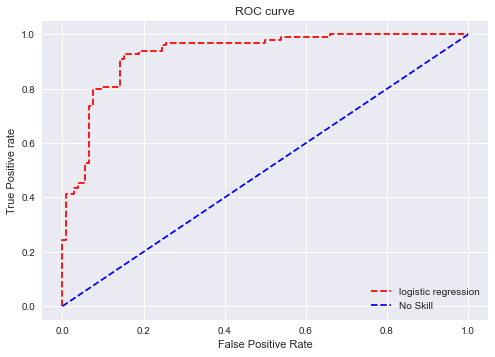

In [42]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='logistic regression')

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--',color='blue', label='No Skill')

# title
plt.title('ROC curve')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')

plt.savefig('ROC', dpi=300)
plt.show()